# Task 1

Text(0.5, 1.0, 'Generated data')

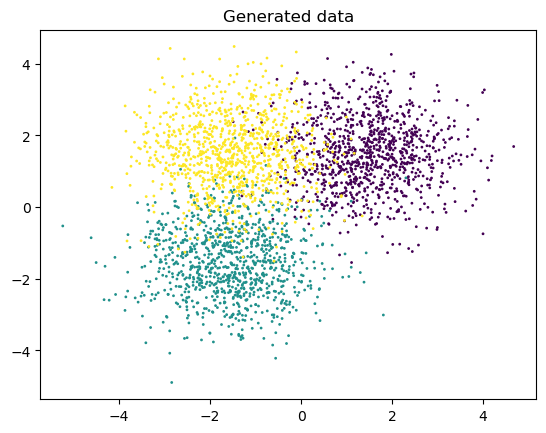

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklvq import GLVQ, GMLVQ, LGMLVQ
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

samples = 3000
classes = 3 
samples_class = samples // classes 

np.random.seed(0)

class_1 = np.random.randn(samples_class, 2) + np.array([1.5, 1.5])
class_2 = np.random.randn(samples_class, 2) + np.array([-1.5, -1.5])
class_3 = np.random.randn(samples_class, 2) + np.array([-1.5, 1.5])

X = np.vstack((class_1, class_2, class_3))
y = np.repeat(np.arange(classes), samples_class)

# Plot the data
plt.figure()
plt.scatter(X[:, 0], X[:, 1], s=1, c=y, cmap='viridis')
plt.title('Generated data')

### Create the 5 and 50 dimension matrix

In [47]:
random_matrix5 = np.random.randn(2, 5)
X5 = X @ random_matrix5

random_matrix50 = np.random.randn(2, 50)
X50 = X @ random_matrix50

### Run the different input data on the models

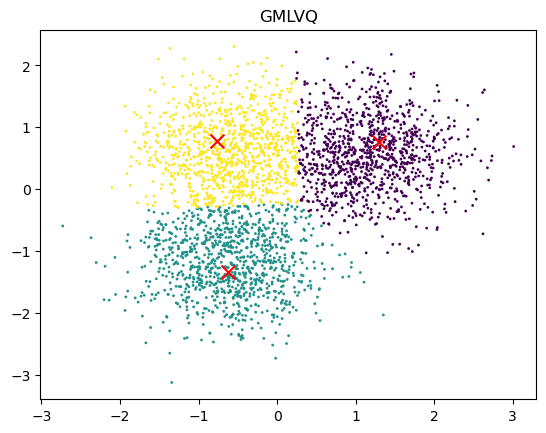

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1000
           1       0.93      0.93      0.93      1000
           2       0.88      0.86      0.87      1000

    accuracy                           0.91      3000
   macro avg       0.91      0.91      0.91      3000
weighted avg       0.91      0.91      0.91      3000



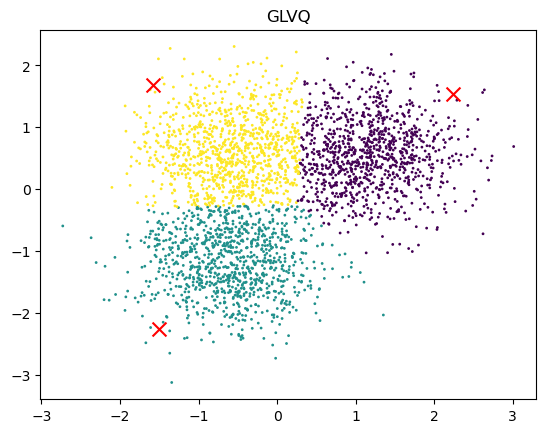

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1000
           1       0.92      0.93      0.93      1000
           2       0.87      0.87      0.87      1000

    accuracy                           0.91      3000
   macro avg       0.91      0.91      0.91      3000
weighted avg       0.91      0.91      0.91      3000



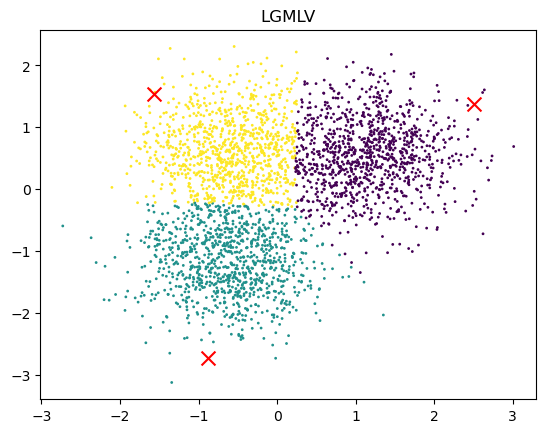

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      1000
           1       0.92      0.93      0.92      1000
           2       0.89      0.85      0.87      1000

    accuracy                           0.91      3000
   macro avg       0.91      0.91      0.91      3000
weighted avg       0.91      0.91      0.91      3000



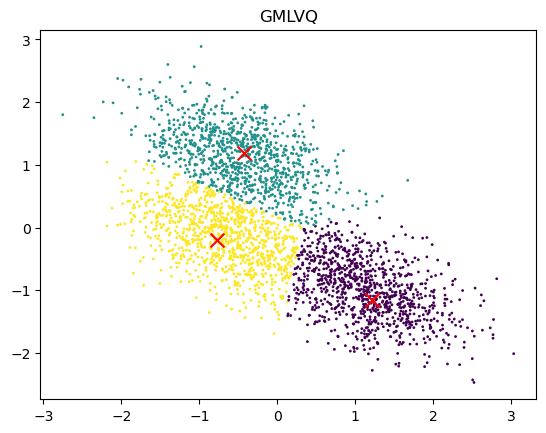

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1000
           1       0.92      0.93      0.93      1000
           2       0.88      0.87      0.87      1000

    accuracy                           0.91      3000
   macro avg       0.91      0.91      0.91      3000
weighted avg       0.91      0.91      0.91      3000



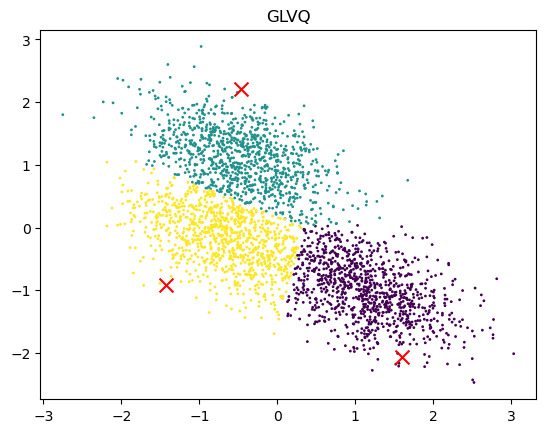

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1000
           1       0.91      0.94      0.93      1000
           2       0.88      0.86      0.87      1000

    accuracy                           0.91      3000
   macro avg       0.91      0.91      0.91      3000
weighted avg       0.91      0.91      0.91      3000



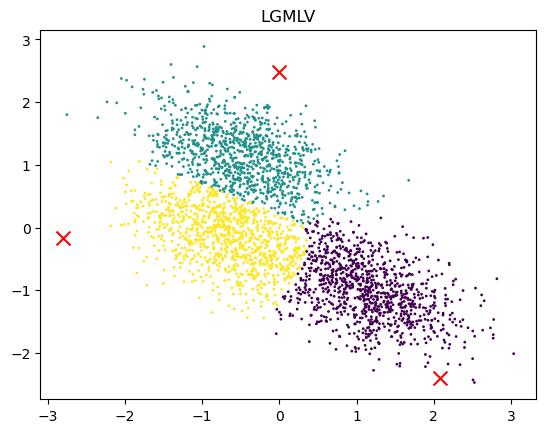

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1000
           1       0.93      0.93      0.93      1000
           2       0.88      0.88      0.88      1000

    accuracy                           0.91      3000
   macro avg       0.91      0.91      0.91      3000
weighted avg       0.91      0.91      0.91      3000



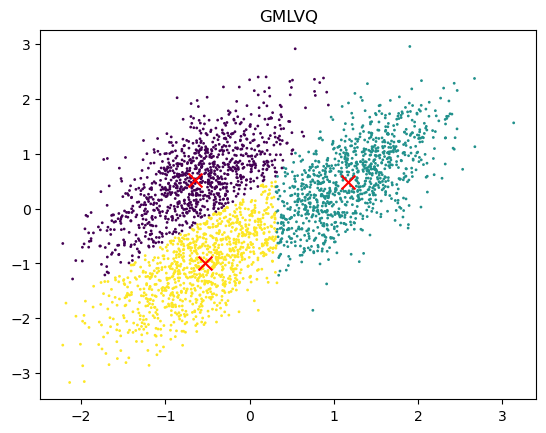

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1000
           1       0.93      0.93      0.93      1000
           2       0.87      0.88      0.87      1000

    accuracy                           0.91      3000
   macro avg       0.91      0.91      0.91      3000
weighted avg       0.91      0.91      0.91      3000



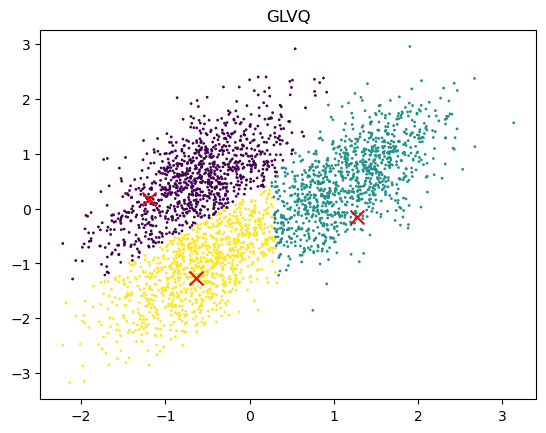

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1000
           1       0.92      0.93      0.93      1000
           2       0.88      0.86      0.87      1000

    accuracy                           0.91      3000
   macro avg       0.91      0.91      0.91      3000
weighted avg       0.91      0.91      0.91      3000



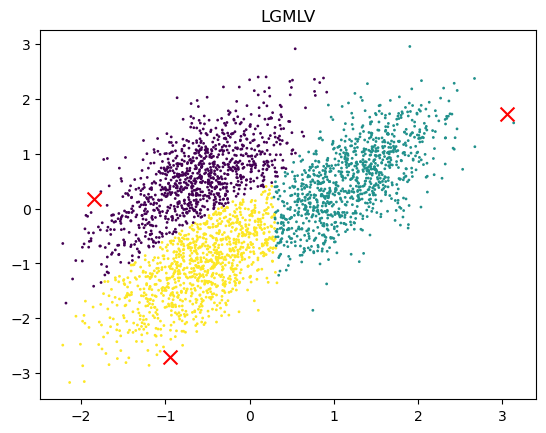

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1000
           1       0.93      0.93      0.93      1000
           2       0.87      0.87      0.87      1000

    accuracy                           0.91      3000
   macro avg       0.91      0.91      0.91      3000
weighted avg       0.91      0.91      0.91      3000



In [48]:
different_x = [X, X5, X50]
models = (
    GMLVQ(
        distance_type="adaptive-squared-euclidean",
        activation_type="swish",
        activation_params={"beta": 2},
        solver_type="waypoint-gradient-descent",
        solver_params={"max_runs": 10, "k": 3, "step_size": np.array([0.1, 0.05])},
        random_state=1428,
    ),
    GLVQ(
        distance_type="squared-euclidean",
        activation_type="swish",
        activation_params={"beta": 2},
        solver_type="steepest-gradient-descent",
        solver_params={"max_runs": 20, "step_size": 0.1},
    ), 
    LGMLVQ( # Used LGMLVQ since it has similar characteristics to GRLVQ
        relevance_localization="class",
        distance_type="local-adaptive-squared-euclidean",
        activation_type="swish",
        activation_params={"beta": 2},
        solver_type="lbfgs",
    ),

)

for x in different_x:
    for model in models:
        scaler = StandardScaler()

        data = scaler.fit_transform(x)


        model.fit(data, y)

        predicted_labels = model.predict(data)

        plt.figure()
        plt.scatter(data[:, 0], data[:, 1], s=1, c=predicted_labels, cmap='viridis')
        plt.scatter(model.prototypes_[:, 0], model.prototypes_[:, 1], c='r', marker='x', s=100)
        plt.title(str(model)[:5].replace("(", ""))
        plt.show()

        print(classification_report(y, predicted_labels))

# Task 2

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

import sklvq.models._base
sklvq.models._base.np.int = int

# Binary Classification for breast cancer patients
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset and normalize data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

# Training and Eval
for model in models:
    model.fit(X_train_norm, y_train)
    y_pred = model.predict(X_test_norm)
    acc = np.mean(y_pred == y_test)
    print(f"Model {str(model)[:5].replace('(', '')} has an accuracy of {acc:.2f}")

    

Model GMLVQ has an accuracy of 0.98
Model GLVQ has an accuracy of 0.99
